In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import io
import seaborn as sns
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [3]:
data = np.loadtxt("alkan/ALKAN.BLD")


In [4]:
data

array([[ 2.,  1.,  0., ...,  2.,  1.,  1.],
       [ 2.,  0.,  2., ...,  5.,  2.,  1.],
       [ 2.,  0.,  2., ..., 10.,  4.,  2.],
       ...,
       [ 6.,  0.,  0., ..., 31., 13.,  2.],
       [ 6.,  0.,  0., ..., 32., 14.,  2.],
       [ 6.,  0.,  0., ..., 30., 12.,  2.]])

In [5]:
data.shape

(74, 210)

In [13]:
vis = pd.DataFrame(data)
vis.head(10)


,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,1.000,0.0,2.000,1.0,1.0,2.0,1.0,1.0
1,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.444,2.667,2.0,2.667,2.0,4.0,5.0,2.0,1.0
2,2.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.00,1.000,5.000,4.0,3.333,3.0,10.0,10.0,4.0,2.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.750,4.500,6.0,3.000,2.0,9.0,7.0,3.0,1.0
4,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,...,0.00,1.600,8.000,10.0,4.000,4.0,20.0,16.0,6.0,2.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1.360,7.200,11.0,3.600,3.0,18.0,13.0,5.0,2.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.960,6.400,12.0,3.200,2.0,16.0,9.0,4.0,1.0
7,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,...,0.63,2.222,11.667,16.0,4.667,5.0,35.0,24.0,9.0,3.0
8,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,2.000,10.667,16.0,4.267,4.0,32.0,20.0,8.0,2.0
9,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,2.000,10.333,20.0,4.133,4.0,31.0,19.0,7.0,2.0


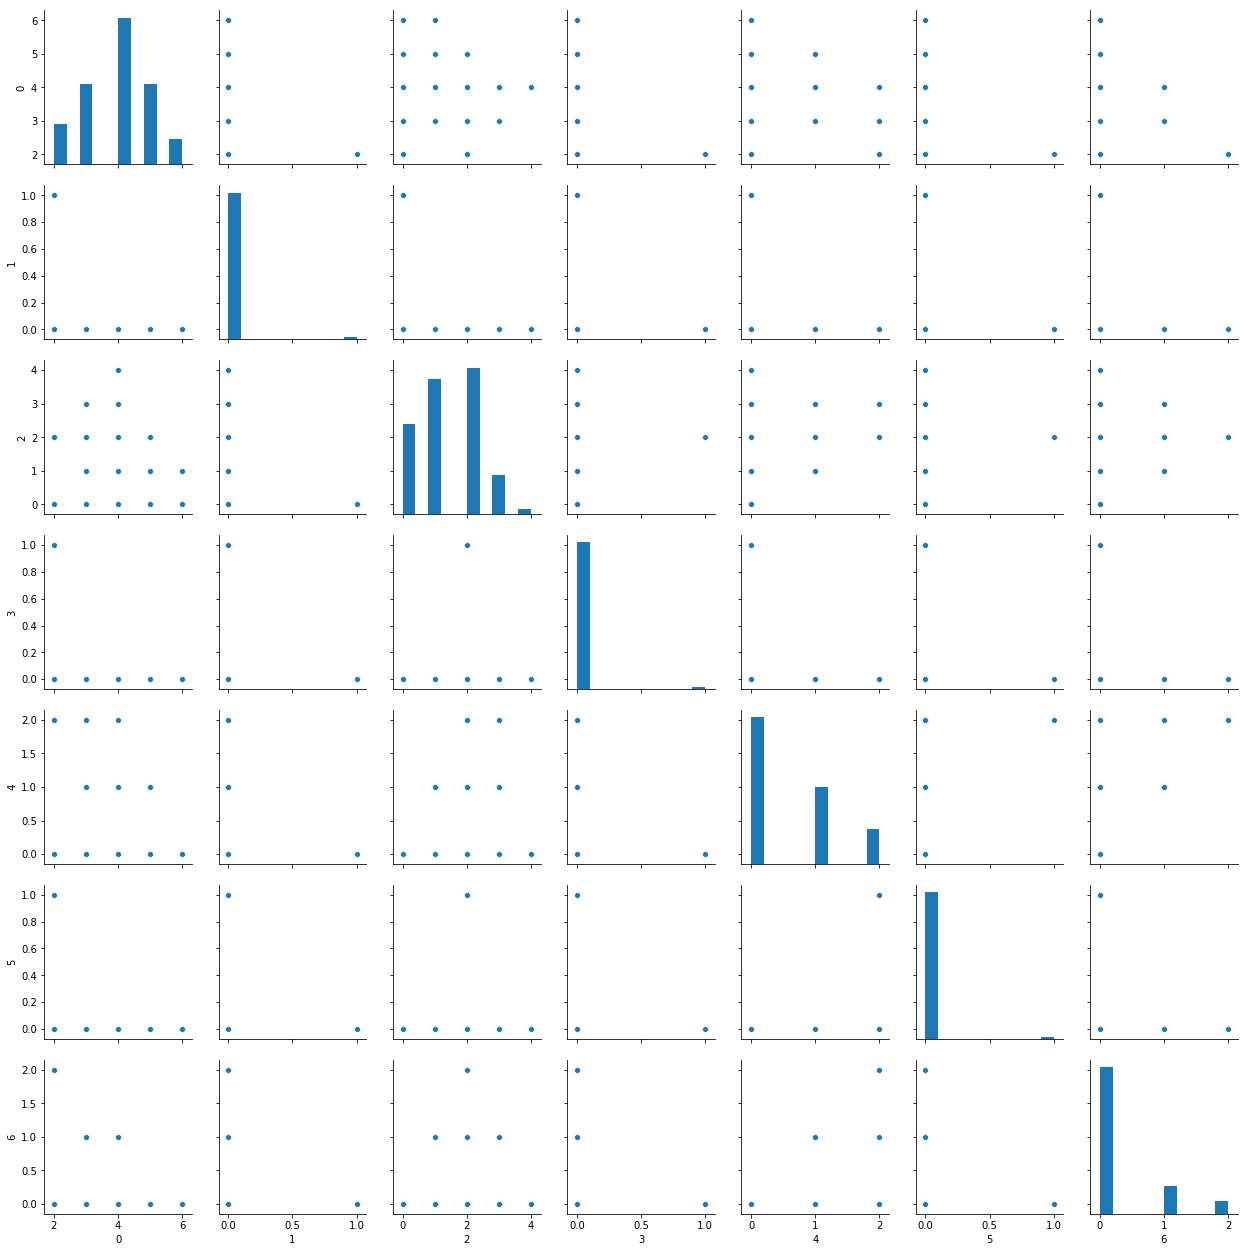

In [14]:

sns.pairplot(vis.iloc(1)[0:7])

In [15]:
n = data.shape[0]
m = data.shape[1]

In [16]:
(n,m)

(74, 210)

In [17]:
l = []
word = 'A1 '
with io.open('alkan/set-str/ALKAN.SET') as file:
    for line in file:
        if (word in line):
            ape = float(line.split()[1])
            #print(ape)
            l.append(ape)

In [18]:
print("Num_features =", len(l))
for i in range(min(len(l), 10)):
    print("feature", i,"=", l[i])

Num_features = 74
feature 0 = -88.63
feature 1 = -42.07
feature 2 = -0.5
feature 3 = -11.73
feature 4 = 36.074
feature 5 = 27.852
feature 6 = 9.503
feature 7 = 68.74
feature 8 = 60.271
feature 9 = 63.282


In [19]:
y = np.array(l)
y.shape

(74,)

In [20]:
y

array([-88.63 , -42.07 ,  -0.5  , -11.73 ,  36.074,  27.852,   9.503,
        68.74 ,  60.271,  63.282,  49.741,  57.988,  98.427,  90.052,
        91.85 ,  93.475,  79.197,  89.784,  80.5  ,  86.064,  80.882,
       125.665, 117.647, 118.925, 117.709, 118.534, 106.84 , 115.607,
       109.429, 109.103, 111.969, 117.725, 115.65 , 118.259, 109.841,
        99.238, 114.76 , 113.467, 106.47 , 150.798, 143.26 , 144.18 ,
       142.48 , 143.   , 141.2  , 132.69 , 140.5  , 133.5  , 136.   ,
       135.21 , 137.3  , 140.6  , 136.   , 135.2  , 138.   , 133.8  ,
       140.6  , 140.4  , 133.6  , 126.54 , 124.084, 137.68 , 139.   ,
       131.34 , 130.648, 140.46 , 146.168, 133.83 , 142.   , 136.73 ,
       140.274, 133.016, 122.284, 141.551])

In [21]:
def R_rise_2 (Eps, y, y_mean):
    result1 = np.sum(Eps**2)
    result2 = np.sum((y-y_mean)**2)
    return 1 - result1 / result2

In [22]:
size_buf = 10
num_selections = 20
#100
#15

In [23]:
model = LinearRegression()

In [24]:
y_mean = data.sum(axis = 1)
y_mean = y_mean / m
y_mean

array([0.09285714, 0.1907381 , 0.33778095, 0.31322381, 0.53822857,
       0.50626667, 0.46634762, 0.79669048, 0.74421905, 0.74644286,
       0.7040619 , 0.69749048, 1.11633333, 1.06962381, 1.06011905,
       1.02632381, 0.99708095, 0.99303333, 1.00302857, 0.9837381 ,
       0.93640952, 1.494     , 1.42669524, 1.41860952, 1.43021905,
       1.40549524, 1.36054762, 1.37269524, 1.3561    , 1.37696667,
       1.35222857, 1.3351619 , 1.32382381, 1.3034619 , 1.2579381 ,
       1.27928095, 1.27077619, 1.29133333, 1.18765238, 1.95123333,
       1.87832857, 1.85914286, 1.87329524, 1.82781905, 1.83665714,
       1.78150476, 1.79542857, 1.79074286, 1.78900476, 1.79551905,
       1.7769    , 1.77144762, 1.76990952, 1.77332857, 1.76851429,
       1.76265714, 1.73765238, 1.7309    , 1.70322857, 1.6973619 ,
       1.72905238, 1.70461429, 1.6983381 , 1.73022857, 1.69916667,
       1.66721429, 1.67419048, 1.63922857, 1.64113333, 1.67244286,
       1.5761619 , 1.60750476, 1.60711429, 1.60879524])

In [25]:
buf_r = np.array([0.0 for i in range(size_buf)])

iter_buf = 0

buf_numbers = np.array([[-1 for i in range(size_buf)] for k in range(num_selections)])
buf_numbers_1 = np.array([[-1 for i in range(size_buf)] for k in range(num_selections)])

buf = np.array([[[float(i) for i in range(size_buf)] for j in range(n)] for k in range(num_selections)])

X1 = np.array([[float(i) for i in range(1)] for j in range(n)])
X2 = np.array([[float(i) for i in range(2)] for j in range(n)])
buf.shape

(20, 74, 10)

In [26]:
%%time
for i in range(m):
    X1[:,0] = data[:,i]
    model.fit(X1, y)
    if iter_buf < size_buf:
            tmp = model.predict(X1)
            buf_r[iter_buf] = R_rise_2(y - tmp, y, y_mean)
            buf_numbers[0, iter_buf] = i
            buf[0, :, iter_buf] = tmp[:]
            iter_buf+= 1
            
    else:
            tmp = model.predict(X1)
            ind = buf_r.argmin()
            buf_r[ind] = R_rise_2(y - tmp, y, y_mean)
            buf_numbers[0, ind] = i
            buf[0, :, ind] = tmp[:]
buf_numbers_1[0, :] = -2
print(buf_numbers, end="\n\n\n\n")

[[196 201 189 202 188 208 195 209 203 206]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]]



CPU times: user 326 ms, sys: 3.95 ms, total: 330 ms
Wall time: 92.7 ms


In [27]:
%%time
for k in range (1, num_selections):
    iter_buf = 0
    for i in range(size_buf):
        for j in range(i + 1, m):
            #print(data[:,i].shape)
            X2[:, 0] = buf[k - 1, :, i]
            X2[:, 1] = data[:, j]
            model.fit(X2, y)
            if iter_buf < size_buf:
                tmp = model.predict(X2)
                buf_r[iter_buf] = R_rise_2(y - tmp, y, y_mean)
                buf_numbers[k, iter_buf] = j
                buf_numbers_1[k, iter_buf] = i
                buf[k, :,iter_buf] = tmp[:]
                iter_buf += 1

            else:
                tmp = model.predict(X2)
                ind = buf_r.argmin()
                buf_r[ind] = R_rise_2(y - tmp, y, y_mean)
                buf_numbers[k, ind] = j
                buf_numbers_1[k, ind] = i
                buf[k, :, ind] = tmp[:]
    
    print("selection", k, "from", num_selections)

selection 1 from 20
selection 2 from 20
selection 3 from 20
selection 4 from 20
selection 5 from 20
selection 6 from 20
selection 7 from 20
selection 8 from 20
selection 9 from 20
selection 10 from 20
selection 11 from 20
selection 12 from 20
selection 13 from 20
selection 14 from 20
selection 15 from 20
selection 16 from 20
selection 17 from 20
selection 18 from 20
selection 19 from 20
CPU times: user 52.7 s, sys: 803 ms, total: 53.5 s
Wall time: 13.4 s


In [30]:
buf_numbers

array([[196, 201, 189, 202, 188, 208, 195, 209, 203, 206],
       [196, 196, 209, 193, 196, 188, 197, 201, 189, 197],
       [206, 206, 192, 192, 206, 206, 206, 199, 209, 206],
       [131, 209, 133,   6,   6, 132, 132, 133, 131, 132],
       [192, 192, 199, 199, 192, 192, 199, 209, 199, 192],
       [  1, 200, 193, 193, 200, 200, 193, 200, 209, 193],
       [121, 186, 121, 122, 186, 209, 122, 121, 186, 186],
       [  1, 113, 113, 113, 113, 113, 113, 209, 112, 112],
       [209, 129,  73, 172, 112, 129, 113,  73,  72, 172],
       [ 73, 209,  73,  72, 172, 132, 172, 129, 129,  72],
       [132, 172, 129,  73, 132, 209, 132, 132, 208,  72],
       [110, 111, 115, 153, 184, 209, 111, 111, 184, 110],
       [115, 153, 153, 115, 110, 209, 184, 153, 115, 111],
       [ 86,  86,  86,  86,  86, 177, 177, 177, 209,  86],
       [  5, 147, 147,   5, 147,   5, 209, 147, 147, 147],
       [  5,  22,   5,   5,  22, 147, 147, 147,  22, 209],
       [  7,   7,   3,   3,   7,   7,   7, 163, 163, 209

In [31]:
buf_numbers_1

array([[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [ 1,  2,  9,  0,  4,  0,  4,  0,  0,  2],
       [ 8,  5,  9,  6,  9,  6,  4,  3,  9,  1],
       [ 4,  9,  4,  4,  5,  4,  5,  5,  5,  1],
       [ 5,  6,  5,  6,  0,  8,  8,  9,  0,  4],
       [ 0,  5,  6,  4,  6,  4,  8,  8,  9,  5],
       [ 7,  4,  4,  7,  7,  9,  4,  2,  6,  2],
       [ 0,  0,  2,  1,  4,  3,  6,  9,  0,  4],
       [ 9,  1,  2,  2,  0,  2,  0,  1,  2,  1],
       [ 6,  9,  4,  4,  4,  6,  6,  6,  4,  6],
       [ 9,  5,  5,  5,  0,  9,  7,  6,  7,  5],
       [ 8,  8,  8,  8,  8,  9,  6,  0,  6,  7],
       [ 4,  1,  4,  0,  2,  9,  2,  0,  1,  2],
       [ 8,  3,  4,  9,  6,  6,  4,  9,  9,  0],
       [ 4,  5,  7,  3,  4,  2,  9,  6,  2,  3],
       [ 1,  3,  2,  4,  5,  0,  5,  3,  0,  9],
       [ 6,  3,  0,  2,  5,  2,  0,  0,  2,  9],
       [ 9,  7,  0,  3,  2,  6,  3,  8,  2,  1],
       [ 3,  6,  4,  9,  3,  3,  4,  2,  4,  9],
       [ 1,  5,  9,  0,  8,  8,  1,  3,  5,  7]])

In [32]:
lis = []
for i in range(size_buf):
    lis.append([buf_numbers[num_selections - 1][i]])


In [33]:
for i in range(num_selections - 1, 1, -1):
    #print(i)
    for j in range(size_buf):
        lis[j].append(buf_numbers[i - 1][buf_numbers_1[i,j]])



In [34]:
for i in range(size_buf):
    lis[i].append(buf_numbers[0][i])

In [35]:
for i in range(size_buf):
    lis[i].sort()

In [190]:
clf = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.8)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


-10.282247101565748

In [191]:
for i in range(size_buf):
    clf.fit(X_train[:,lis[i]], y_train)
    print(clf.score(X_test[:,lis[i]], y_test))

0.9966498492341932
0.9966504811589989
0.9969521796445622
0.9707160359029643
0.998485295732831
0.8999678861233021
0.9957290823054128
0.801799069510089
0.7985913988994785
0.9856192010147533
